In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [132]:
df = pd.read_csv('C:/Users/Abhishek Sharma/Downloads/diabetes1.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [133]:
df.shape

(768, 9)

In [134]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [135]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


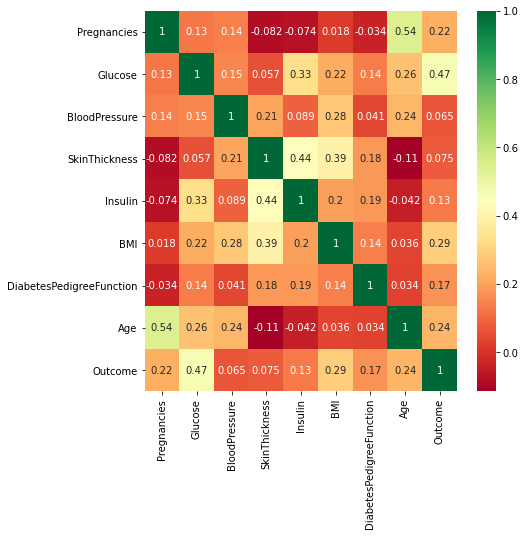

In [136]:
# correlation
import seaborn as sns

plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [137]:
diabetes_true_count = len(df.loc[df['Outcome'] == 1])
diabetes_false_count = len(df.loc[df['Outcome'] == 0])

In [138]:
diabetes_true_count,diabetes_false_count

(268, 500)

In [139]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=5)

In [141]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


### check how many other missing (Zero) value

In [142]:
print('Total number of rows : {0}'.format(len(df)))
print('number of the rows missing Pregnancies : {0}'.format(len(df.loc[df['Pregnancies'] == 0])))
print('number of the rows missing Glucose : {0}'.format(len(df.loc[df['Glucose'] == 0])))
print('number of the rows missing BloodPressure : {0}'.format(len(df.loc[df['BloodPressure'] == 0])))
print('number of the rows missing SkinThickness : {0}'.format(len(df.loc[df['SkinThickness'] == 0])))
print('number of the rows missing Insulin : {0}'.format(len(df.loc[df['Insulin'] == 0])))
print('number of the rows missing BMI : {0}'.format(len(df.loc[df['BMI'] == 0])))
print('number of the rows missing DiabetesPedigreeFunction : {0}'.format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print('number of the rows missing Age : {0}'.format(len(df.loc[df['Age'] == 0])))

Total number of rows : 768
number of the rows missing Pregnancies : 111
number of the rows missing Glucose : 5
number of the rows missing BloodPressure : 35
number of the rows missing SkinThickness : 227
number of the rows missing Insulin : 374
number of the rows missing BMI : 11
number of the rows missing DiabetesPedigreeFunction : 0
number of the rows missing Age : 0


In [143]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0,strategy='mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [144]:
# Apply algorithm
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train,y_train.ravel())

RandomForestClassifier(random_state=10)

In [145]:
predict_train_data = random_forest_model.predict(X_test)

In [146]:
from sklearn import metrics

In [147]:
print("Accuracy = ",metrics.accuracy_score(y_test,predict_train_data))

Accuracy =  0.7878787878787878


In [148]:
# Hyper perameter optimization

params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7,1]
}

In [149]:
#  Hyper perameter optimization usnig RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [150]:
classifier = xgboost.XGBClassifier() 

In [151]:
random_search = RandomizedSearchCV(estimator=classifier,param_distributions=params,
                                  n_iter = 5,scoring = 'roc_auc',n_jobs = 1,cv = 5,verbose = 3)

In [152]:
def timer(start_time = None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec = divmod((datetime.now() - start_time).total_seconds(),3600)
        tmin,tsec = divmod(temp_sec,60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec , 2)))

In [153]:
from datetime import datetime

start_time = timer(None) #training start from this point for "start_time" variable
random_search.fit(X_train,y_train.ravel())
timer(start_time) #timing ends here for "start time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.1, colsample_bytree=1 
[CV]  min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.1, colsample_bytree=1, score=0.841, total=   0.0s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.1, colsample_bytree=1 
[CV]  min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.1, colsample_bytree=1, score=0.762, total=   0.0s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.1, colsample_bytree=1 
[CV]  min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.1, colsample_bytree=1, score=0.860, total=   0.0s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.1, colsample_bytree=1 
[CV]  min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.1, colsample_bytree=1, score=0.837, total=   0.0s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.05, gamma=0.1, colsample_bytree=1 
[CV]  min_child_weight=3, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5, score=0.769, total=   0.1s
[CV] min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5, score=0.721, total=   0.0s
[CV] min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5, score=0.814, total=   0.1s
[CV] min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5, score=0.829, total=   0.0s
[CV] min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=15, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5, score=0.854, total=   0.0s
[CV] min_child_weight=1, max_dep

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.1s finished


In [154]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [155]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, colsmaple_bytree=0.7,
              gamma=0.2, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=7,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [156]:
classifier.fit(X_train,y_train)

[23:01:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsmaple_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, colsmaple_bytree=0.7,
              gamma=0.2, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [157]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X_train,y_train.ravel(),cv=10)

[23:01:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsmaple_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:01:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsmaple_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:01:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsmaple_bytree } might not be used.

  This may not be accurate due to some parameters are onl

In [158]:
score

array([0.77777778, 0.74074074, 0.72222222, 0.72222222, 0.7962963 ,
       0.72222222, 0.7037037 , 0.81132075, 0.75471698, 0.77358491])

In [159]:
score.mean()

0.7524807826694618

In [160]:
y_pred = classifier.predict(X_test)

In [161]:
from sklearn.metrics import confusion_matrix ,accuracy_score

In [162]:
confusion_matrix(y_test,y_pred)

array([[127,  33],
       [ 19,  52]], dtype=int64)

In [163]:
accuracy_score(y_test,y_pred)

0.7748917748917749